# Wczytanie danych

In [13]:
import pandas as pd
import numpy as np

np.random.seed(1)
df = pd.read_csv('bmw.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


# Analiza wstępna

year: Średnia = 2017.078935163714, Mediana = 2017.0
kurtoza = 7.161601588988656, skośność = -1.7889099873944039

mileage: Średnia = 25496.986550412763, Mediana = 18347.0
kurtoza = 2.2244099292365505, skośność = 1.3829081153150047

tax: Średnia = 131.70206845376126, Mediana = 145.0
kurtoza = 9.253827631516113, skośność = 0.8277132789095102

mpg: Średnia = 56.39903533994991, Mediana = 53.3
kurtoza = 120.4029303524986, skośność = 9.627894200288717

engineSize: Średnia = 2.1677673685186902, Mediana = 2.0
kurtoza = 2.4369016564468327, skośność = 0.8514037656149344

price: Średnia = 22733.408867452, Mediana = 20462.0
kurtoza = 4.019066282679349, skośność = 1.5866656702684085



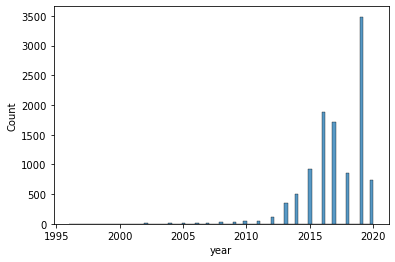

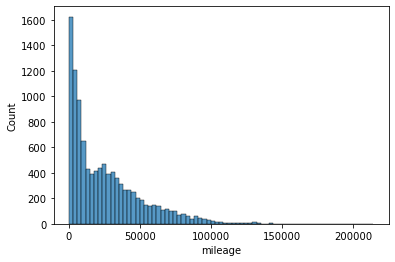

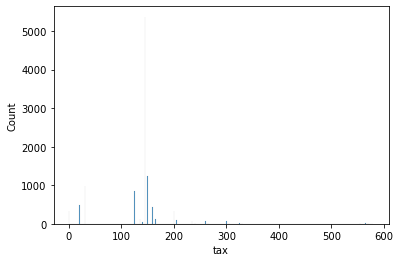

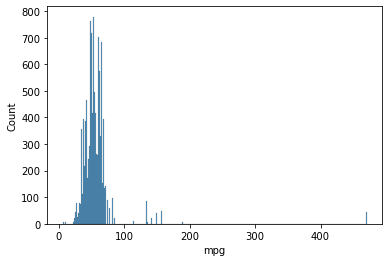

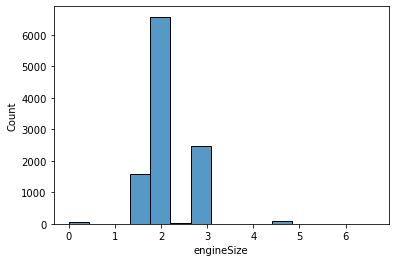

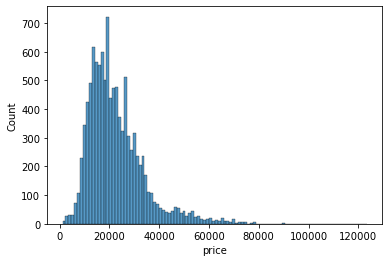

<Figure size 432x288 with 0 Axes>

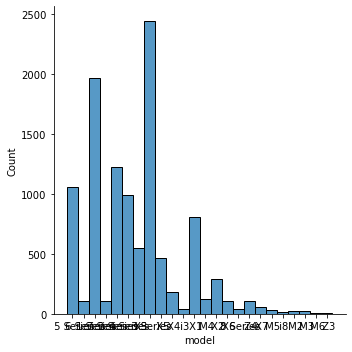

<Figure size 432x288 with 0 Axes>

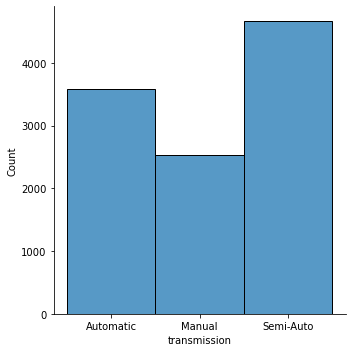

<Figure size 432x288 with 0 Axes>

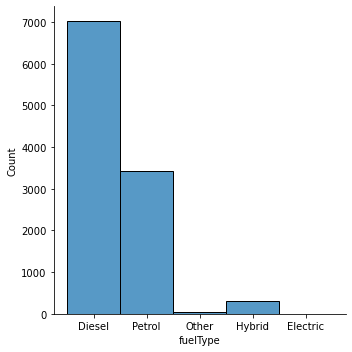

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

numerical = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
text = ['model', 'transmission', 'fuelType']

for name in numerical:
    print(f"{name}: Średnia = {np.mean(df[name])}, Mediana = {np.median(df[name])}")
    print(f"kurtoza = {kurtosis(df[name])}, skośność = {skew(df[name])}\n")
    plt.figure()
    sns.histplot(df[name])
for name in text:
    plt.figure()
    sns.displot(df[name])

In [15]:
from scipy.stats import skew, kurtosis
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
for column in numerical_features:
    print({'column': column, 'stats': {'kurtosis':kurtosis(df[column]), 'skew':skew(df[column])}})

{'column': 'year', 'stats': {'kurtosis': 7.161601588988656, 'skew': -1.7889099873944039}}
{'column': 'mileage', 'stats': {'kurtosis': 2.2244099292365505, 'skew': 1.3829081153150047}}
{'column': 'tax', 'stats': {'kurtosis': 9.253827631516113, 'skew': 0.8277132789095102}}
{'column': 'mpg', 'stats': {'kurtosis': 120.4029303524986, 'skew': 9.627894200288717}}
{'column': 'engineSize', 'stats': {'kurtosis': 2.4369016564468327, 'skew': 0.8514037656149344}}
{'column': 'price', 'stats': {'kurtosis': 4.019066282679349, 'skew': 1.5866656702684085}}


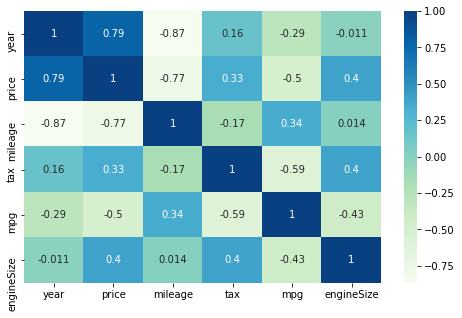

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='GnBu')
plt.show()

# Wstępne przetwarzanie danych

## Oddzielenie ceny

In [18]:
Y = df['price']
df = df.drop('price', 1)
columns = df.columns
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0


## Kodowanie wartości tekstowych

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labeledAttributes = ['model', 'transmission', 'fuelType']
ohe = OneHotEncoder()
ohe.fit_transform(df[labeledAttributes])
ohencoded = pd.DataFrame(ohe.fit_transform(df[labeledAttributes]).toarray(), columns=ohe.get_feature_names())

df = df.drop(labeledAttributes, 1).join(ohencoded)
df

,year,mileage,tax,mpg,engineSize,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,...,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol
0,2014,67068,125,57.6,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018,14827,145,42.8,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016,62794,160,51.4,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2017,26676,145,72.4,1.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2014,39554,160,50.4,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,40818,150,54.3,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10777,2016,42947,125,60.1,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10778,2017,25468,200,42.8,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10779,2014,45000,30,64.2,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Dopisanie cech wielomianowych

In [20]:
from sklearn.preprocessing import PolynomialFeatures
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

pf = PolynomialFeatures(degree=2, interaction_only=False)
dfPoly = pd.DataFrame(pf.fit_transform(df[numerical_features].values))
dfPoly = df.join(dfPoly)
dfPoly

,year,mileage,tax,mpg,engineSize,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,...,11,12,13,14,15,16,17,18,19,20
0,2014,67068,125,57.6,2.0,0.0,0.0,0.0,0.0,1.0,...,4.498117e+09,8383500.0,3863116.8,134136.0,15625.0,7200.0,250.0,3317.76,115.2,4.00
1,2018,14827,145,42.8,2.0,0.0,0.0,0.0,0.0,0.0,...,2.198399e+08,2149915.0,634595.6,29654.0,21025.0,6206.0,290.0,1831.84,85.6,4.00
2,2016,62794,160,51.4,3.0,0.0,0.0,0.0,0.0,1.0,...,3.943086e+09,10047040.0,3227611.6,188382.0,25600.0,8224.0,480.0,2641.96,154.2,9.00
3,2017,26676,145,72.4,1.5,1.0,0.0,0.0,0.0,0.0,...,7.116090e+08,3868020.0,1931342.4,40014.0,21025.0,10498.0,217.5,5241.76,108.6,2.25
4,2014,39554,160,50.4,3.0,0.0,0.0,0.0,0.0,0.0,...,1.564519e+09,6328640.0,1993521.6,118662.0,25600.0,8064.0,480.0,2540.16,151.2,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,2016,40818,150,54.3,2.0,0.0,0.0,0.0,0.0,0.0,...,1.666109e+09,6122700.0,2216417.4,81636.0,22500.0,8145.0,300.0,2948.49,108.6,4.00
10777,2016,42947,125,60.1,2.0,0.0,0.0,0.0,0.0,1.0,...,1.844445e+09,5368375.0,2581114.7,85894.0,15625.0,7512.5,250.0,3612.01,120.2,4.00
10778,2017,25468,200,42.8,2.0,0.0,0.0,1.0,0.0,0.0,...,6.486190e+08,5093600.0,1090030.4,50936.0,40000.0,8560.0,400.0,1831.84,85.6,4.00
10779,2014,45000,30,64.2,2.0,1.0,0.0,0.0,0.0,0.0,...,2.025000e+09,1350000.0,2889000.0,90000.0,900.0,1926.0,60.0,4121.64,128.4,4.00


## Normalizacja

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dfPoly = pd.DataFrame(ss.fit_transform(dfPoly))
df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
df

,year,mileage,tax,mpg,engineSize,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,...,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol
0,-1.310782,1.653447,-0.108963,0.038326,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,3.034680,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
1,0.392121,-0.424388,0.216199,-0.433982,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,-0.329524,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,-1.368163,-0.016684,-0.168603,-0.057883,1.468028
2,-0.459331,1.483453,0.460070,-0.159533,1.507591,-0.472700,-0.358698,-0.541291,-0.318867,3.034680,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
3,-0.033605,0.046894,0.216199,0.510634,-1.209662,2.115507,-0.358698,-0.541291,-0.318867,-0.329524,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
4,-1.310782,0.559104,0.460070,-0.191445,1.507591,-0.472700,-0.358698,-0.541291,-0.318867,-0.329524,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10776,-0.459331,0.609379,0.297489,-0.066986,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,-0.329524,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
10777,-0.459331,0.694058,-0.108963,0.118108,-0.303911,-0.472700,-0.358698,-0.541291,-0.318867,3.034680,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186
10778,-0.033605,-0.001153,1.110393,-0.433982,-0.303911,-0.472700,-0.358698,1.847435,-0.318867,-0.329524,...,-0.063281,-0.039741,-0.706271,1.807297,-0.873523,-1.368163,-0.016684,-0.168603,-0.057883,1.468028
10779,-1.310782,0.775714,-1.653480,0.248950,-0.303911,2.115507,-0.358698,-0.541291,-0.318867,-0.329524,...,-0.063281,-0.039741,1.415888,-0.553312,-0.873523,0.730907,-0.016684,-0.168603,-0.057883,-0.681186


## PCA

Pca pogarsza wyniki

In [22]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.55)
# df = pd.DataFrame(pca.fit_transform(df.values))
# df

## Podział na zbiór testowy i treningowy

In [23]:
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(df.values,Y,test_size=0.2)
XTrainPoly, XTestPoly, YTrainPoly, YTestPoly = train_test_split(dfPoly.values,Y,test_size=0.2)

# Modele

## Uczenie i testowanie modelu liniowego

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(XTrain, YTrain)
predicted = model.predict(XTest)
r2_score(YTest, predicted)

0.8556336013751835

## Model wielomianowy

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(XTrainPoly, YTrainPoly)
predicted = model.predict(XTestPoly)
r2_score(YTestPoly, predicted)

0.9227347449790241

## SVR

In [26]:
from sklearn.svm import SVR

svr = SVR(kernel='poly')
svr.fit(XTrain, YTrain)
predicted = svr.predict(XTest)
r2_score(YTest, predicted)

0.07708891605931056

## RandomForrestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(XTrain, YTrain)
predicted = rf.predict(XTest)
r2_score(YTest, predicted)

0.9577653318935748